In [1]:
from coord import *
import matplotlib.pyplot as plt
import numpy as np
from genreflex import get_v, plot_reflex_model, make_apex_data, table2_results, make_bulk_motion_data
import matplotlib as mpl
import matplotlib.cm as cm


In [2]:
# Results from table 1 in YPP+2024
lrr = np.array([119.8, 139.1, 63.5, 37.8])
brr = np.array([19.5, -59.4, -46.4, -37.3])
vtrr= np.array([15.7, 16.6, 23.2, 40.4])
vrrr= np.array([7.9, -10.1, -27, -8.5])
vphirr=np.array([-11.5,-13.5,-20.,-23.])
vthrr =np.array([-8., 8., 19,17.3])

# uncomment for pure reflex motion
vrrr = np.zeros_like(lrr)
vphirr = np.zeros_like(lrr)
vthrr = np.zeros_like(lrr)



In [3]:
M, eu ,ed, mid = table2_results()
M.shape

(4, 9)

[23.85 34.31 44.14 59.8 ]


array([<AxesSubplot:ylabel='$v_{r}$ $\\rm km ~s^{-1}$'>,
       <AxesSubplot:ylabel='$v_{\\phi}$ $\\rm km ~s^{-1}$ '>,
       <AxesSubplot:xlabel='$r_{\\rm galactocentric}$ kpc ', ylabel='$v_{\\theta}$ $\\rm km ~s^{-1}$'>],
      dtype=object)

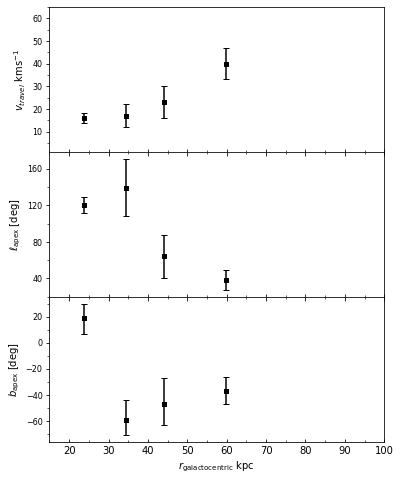

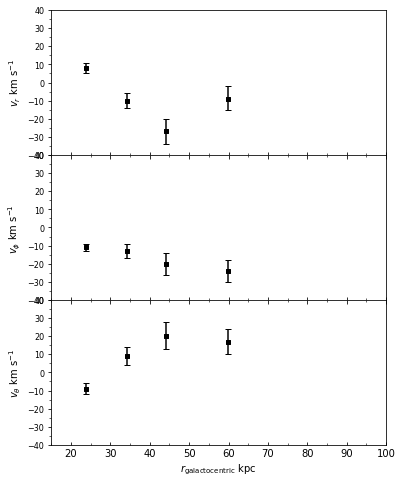

In [4]:
#Reproduce figure 1.
fig,ax = plt.subplots(3, facecolor="white",figsize=(6,8))
plt.subplots_adjust(hspace=0.0)
make_apex_data(ax)

fig2, ax2 = plt.subplots(3, facecolor="white",figsize=(6,8))
plt.subplots_adjust(hspace=0.0)

make_bulk_motion_data(ax2, ebarc="k")

## Plotting the line-of-sight velocity maps with only reflex motion (no bulk motions included)

the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [5.44215897 5.44215897 5.44215897 5.44215897 5.44215897]
vl:  [-18273.37777081 -18273.37777081 -18273.37777081 -18273.37777081
 -18273.37777081]
vb:  [10255.0414928 10255.0414928 10255.0414928 10255.0414928 10255.0414928]
using axes defined outside function
using vlosnorm
the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [-14.10622464 -14.10622464 -14.10622464 -14.10622464 -14.10622464]
vl:  [-7872.28651557 -7872.28651557 -7872.28651557 -7872.28651557
 -7872.28651557]
vb:  [9646.76924698 9646.76924698 9646.76924698 9646.76924698 9646.76924698]
using axes defined outside function
using vlosnorm
the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [-16.99177969 -16.99177969 -16.99177969 -16.99177969 -16.99177

/tmp/ipykernel_30463/22151532.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Text(0.5, 1.0, 'Reflex model in line of sight velocity')

<Figure size 432x288 with 0 Axes>

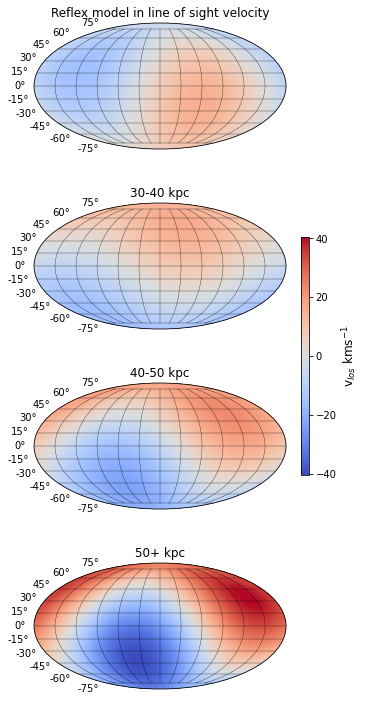

In [9]:
distance_titles = ["20-30 kpc", "30-40 kpc", "40-50 kpc", "50+ kpc"]
kcolor = 'lightslategrey'

pointres = 100
rgal = np.zeros((int(pointres**2.), 3))
vgal = np.zeros((int(pointres**2.), 3))
phirange = np.linspace(0,2.*np.pi,pointres)
thrange = np.linspace(-np.pi/2.,np.pi/2.,pointres)
pp,tt = np.meshgrid(phirange,thrange)

ppflat = pp.reshape(-1,)
ttflat = tt.reshape(-1,)

rgal[:,0] = np.cos(ttflat)*np.cos(ppflat)
rgal[:,1]  = np.cos(ttflat)*np.sin(ppflat)
rgal[:,2]  = np.sin(ttflat)

vgal[:,0] = np.zeros(int(pointres**2.))
vgal[:,1] = np.zeros(int(pointres**2.))
vgal[:,2] = np.zeros(int(pointres**2.))

vtrrflip=np.flip(vtrr)
plt.clf()

fig = plt.figure(figsize=(7, 10))

ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.33
ax7 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax = [ax7]

ax = [ax4, ax3, ax2, ax1]
    
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    vlosnormcube = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, vlosnorm, _, _ = get_v(vlosnormcube,rgal*300., vgal*240./1.4, solar=False)
    plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="vlos", vlosnorm=vlosnorm)
    ax[i].grid(True, c="k", lw=0.3)	
    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )
    
    #adding custom colorbar
    norm = mpl.colors.Normalize(vmin=-vtrrflip[0], vmax=vtrrflip[0])
    cb = mpl.colorbar.ColorbarBase(cbarax[0], cmap = cm.coolwarm, norm = norm)
    cb.set_label('v$_{los}$ kms$^{-1}$',size=12)
    cb.set_ticks(ticks=np.array([-vtrrflip[0], np.round(-vtrrflip[0]/2.,0), 0, np.round(vtrrflip[0]/2.,0), vtrrflip[0]]).astype(int))
plt.tight_layout()
ax[0].set_title("Reflex model in line of sight velocity")

## Plotting the proper motion map


the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [5.44215897 5.44215897 5.44215897 5.44215897 5.44215897]
vl:  [-18273.37777081 -18273.37777081 -18273.37777081 -18273.37777081
 -18273.37777081]
vb:  [10255.0414928 10255.0414928 10255.0414928 10255.0414928 10255.0414928]
using axes defined outside function
the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [-14.10622464 -14.10622464 -14.10622464 -14.10622464 -14.10622464]
vl:  [-7872.28651557 -7872.28651557 -7872.28651557 -7872.28651557
 -7872.28651557]
vb:  [9646.76924698 9646.76924698 9646.76924698 9646.76924698 9646.76924698]
using axes defined outside function
the first 5 values of dist, vlos, mul, mub are:
dist:  [300.13478705 300.13478705 300.13478705 300.13478705 300.13478705]
vlos:  [-16.99177969 -16.99177969 -16.99177969 -16.99177969 -16.99177969]
vl:  [-20373.18839826 -20

/tmp/ipykernel_30463/2203906943.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


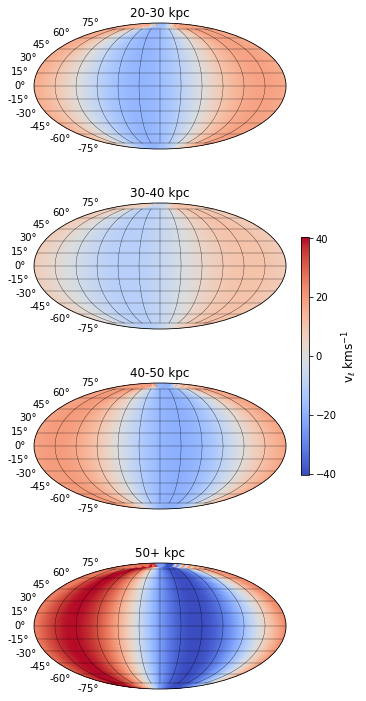

In [13]:
fig = plt.figure(figsize=(7, 10))


ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.33
ax7 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax = [ax7]

ax = [ax4, ax3, ax2, ax1]
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    vlnorm = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, _, vl, _ = get_v(vlnorm,rgal*300., vgal*240./1.4, solar=False)
    im = plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="mul", mulnorm=vl)
    ax[i].grid(True, c="k", lw=0.3)	

    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )

    #adding custom colorbar
    norm = mpl.colors.Normalize(vmin=-vtrrflip[0], vmax=vtrrflip[0])
    cb = mpl.colorbar.ColorbarBase(cbarax[0], cmap = cm.coolwarm, norm = norm)
    cb.set_label('v$_{\ell}$ kms$^{-1}$',size=12)
    cb.set_ticks(ticks=np.array([-vtrrflip[0], np.round(-vtrrflip[0]/2.,0), 0, np.round(vtrrflip[0]/2.,0), vtrrflip[0]]).astype(int))  
plt.tight_layout()

## Plotting the proper motion in b map

using axes defined outside function
using axes defined outside function
using axes defined outside function
using axes defined outside function


/tmp/ipykernel_28621/1286336650.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


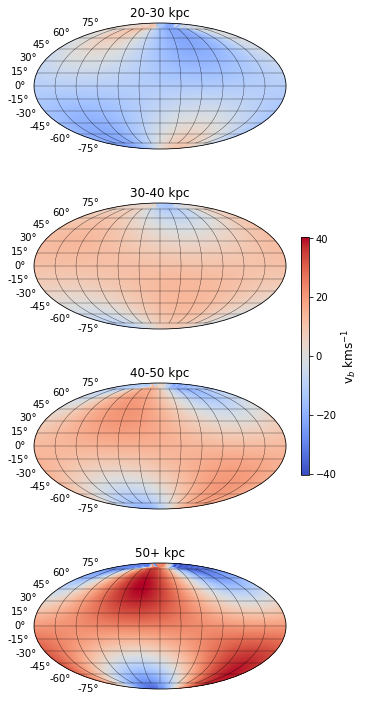

In [115]:
fig = plt.figure(figsize=(7, 10))

ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.33
ax7 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax = [ax7]

ax = [ax4, ax3, ax2, ax1]
    
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    vbnorm = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, _, _, vb = get_v(vbnorm,rgal*300., vgal*240./1.4, solar=False)
    im = plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="mub", mubnorm=vb)
    ax[i].grid(True, c="k", lw=0.3)	

    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )

    #adding custom colorbar
    norm = mpl.colors.Normalize(vmin=-vtrrflip[0], vmax=vtrrflip[0])
    cb = mpl.colorbar.ColorbarBase(cbarax[0], cmap = cm.coolwarm, norm = norm)
    cb.set_label('v$_{b}$ kms$^{-1}$',size=12)
    cb.set_ticks(ticks=np.array([-vtrrflip[0], np.round(-vtrrflip[0]/2.,0), 0, np.round(vtrrflip[0]/2.,0), vtrrflip[0]]).astype(int))  
plt.tight_layout()